# Wright-Fisher Simulator
#### Chris Porras

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)
%matplotlib inline

### WF simulator for a single deme
Simulates allele frequency changes in a haploid population of size N based on a Wright-Fisher model with the following parameters:<br>
    $s$ is the selection coefficient or selection rate for purifying selection <br>
    $\mu$ is the mutation rate

In [7]:
def WF_sim(N,mu,s,num_reps,num_gen,p0):
    f = np.zeros((num_gen+1,num_reps))
    f[0] = [p0]*num_reps
    for j in range(num_gen):
        p = f[j]+mu*(1-2*f[j])-s*f[j]*(1-f[j])
        f[j+1]= np.random.binomial(N,p)/N
    return f

In [8]:
# Define parameters for single deme
s = 10**-2 # selection rate
N = 10**3 # population size
mu = 10**-4 # mutation rate
num_reps = 100 # number of independent sites simulated
num_gen = 2* 10**3 # number of simulation generations
p0 = 0.1 # initial allele frequency

In [9]:
f = WF_sim(N,mu,s,num_reps,num_gen,p0)

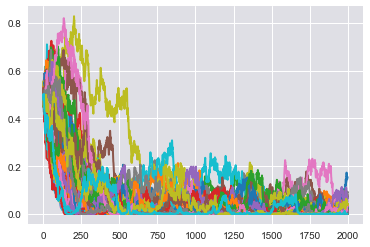

In [10]:
plt.plot(f)
plt.show()

### WF Simulator with stepping stone migration
Introduces migration as per the Kimura stepping stone model. Simulates a 1D ring of demes, or subpopulations connected by a symmettric migration rate $m$.

In [135]:
p = np.array(p)
p[np.where(p<1)] = 0
p

array([0., 0., 0.])

In [117]:
p = [0,-1,.5]
if any(p) < 1:
    print(p[np.where(p<1)])

In [122]:
(p<1).any()

TypeError: '<' not supported between instances of 'list' and 'int'

In [136]:
def SS_WF_sim(N,mu,s,m,num_reps,num_gen,num_demes,p0):
    f = np.zeros((num_gen+1,num_reps,num_demes))
    f[0] = np.repeat(np.repeat(p0,num_reps),
                     num_demes).reshape(num_reps,num_demes)
    for j in range(num_gen):
        for i in range(num_demes):
            if (i+1) >= num_demes:
                i = i - num_demes
            df = mu*(1-2*f[j,:,i])-s*f[j,:,i]*(1-f[j,:,i])+m*(f[j,:,i-1]+f[j,:,i+1]-2*f[j,:,i])
            p = f[j,:,i] + df
            p[np.where(np.array(p) < 0)] =0 
            p[np.where(np.array(p) > 1)] =1
            f[j+1,:,i]= np.random.binomial(N,p)/N
    return f

In [146]:
# Define parameters for 1D chain of demes
s = 0 # selection rate
N = 10**3 # population size
mu = 10**-4 # mutation rate
m = 0.1 # migration rate
num_demes = 50 # number of demes simulated
num_reps = 1000 # number of independent sites simulated
num_gen = 5* 10**3 # number of simulation generations
p0 = 0.1 # initial allele frequency

In [147]:
f = SS_WF_sim(N,mu,s,m,num_reps,num_gen,num_demes,p0)

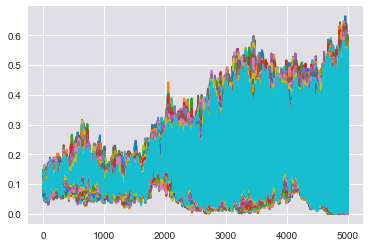

In [139]:
for r in range(num_demes):
    plt.plot(f[:,0,r])
plt.show()

In [190]:
# Standardize data
prep_f = (f[-1] - np.mean(f[-1],axis=0))/(np.std(f[-1],axis=0) + np.finfo(float).eps)

In [191]:
prep_f.shape

(1000, 50)

In [193]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
PCs = pca.fit_transform(prep_f)

In [194]:
print(pca.explained_variance_ratio_)

[0.64094389 0.10873182 0.09795972]


## PCA Plots below 
> Messy, unoptimized cells incoming

Text(0.5,0.92,'WF_SS_Sim')

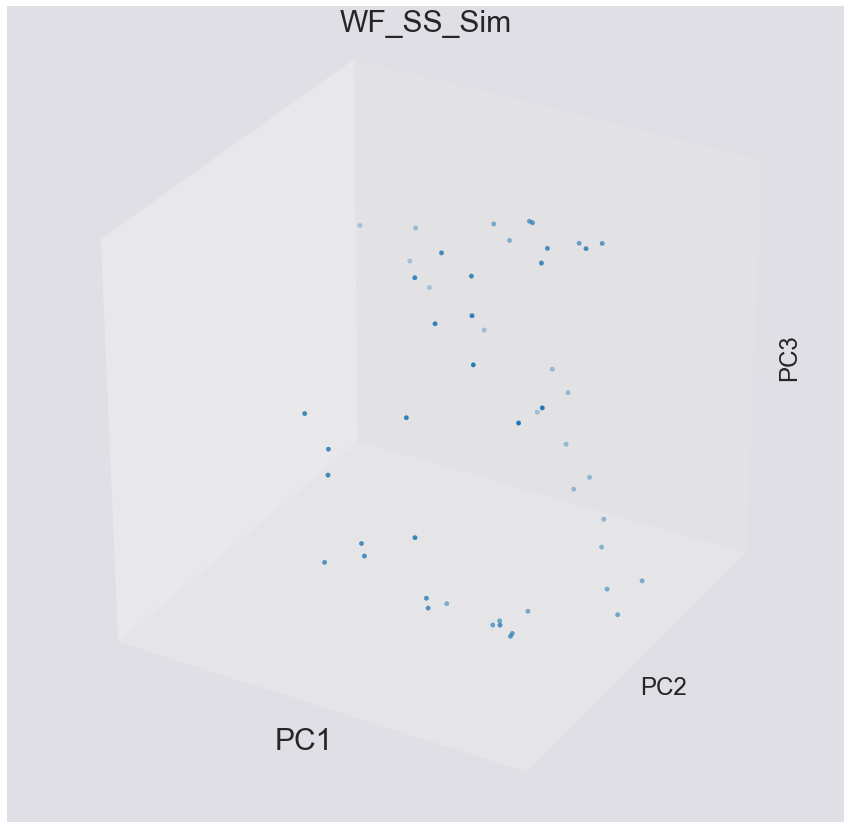

In [195]:
from mpl_toolkits import mplot3d
Matrix = prep_f

PC1 = Matrix.T@PCs[:, 0]
PC2 = Matrix.T@PCs[:, 1]
PC3 = Matrix.T@PCs[:, 2]

fig = plt.figure(figsize=(15,15))
plot_name = "WF_SS_Sim"

ax = plt.axes(projection ='3d')

ax.scatter3D(PC1,PC2,PC3)

ax.set_xlabel('PC1', fontsize=30)
ax.set_xticks([])
ax.set_ylabel('PC2',fontsize=24)
ax.set_yticks([])
ax.set_zlabel(r'PC3', fontsize=24,rotation = 90)
ax.set_zticks([])
ax.set_title(plot_name, fontsize=30,pad = 40)


In [196]:
PC1.shape

(50,)

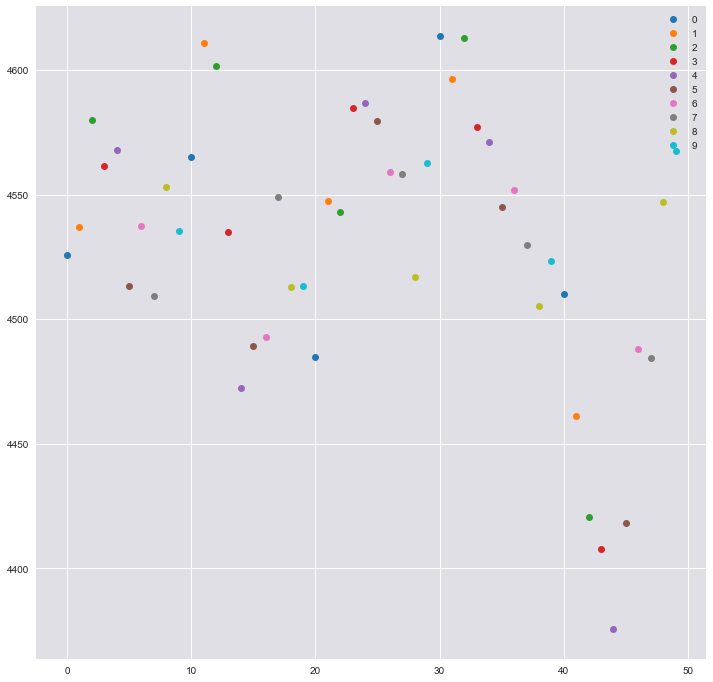

In [197]:
plt.figure(figsize=(12,12))
labels = np.arange(10)
for i in range(len(PC2)):
    if i in labels:
        mylabel = str(labels[i])
    else:
        mylabel = None
    plt.plot(np.arange(num_demes)[i],PC1[i],"o",label = mylabel)
# plt.xlabel('PC2')
# plt.xticks([])
# plt.ylabel(ylabel ="PC3")
# plt.yticks([])
plt.legend(loc = "upper right")
plt.savefig("WFsim_x_PC1.png",quality = 95)
plt.show()  

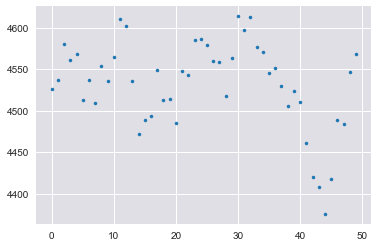

In [198]:
plt.plot(np.arange(num_demes),PC1,".")

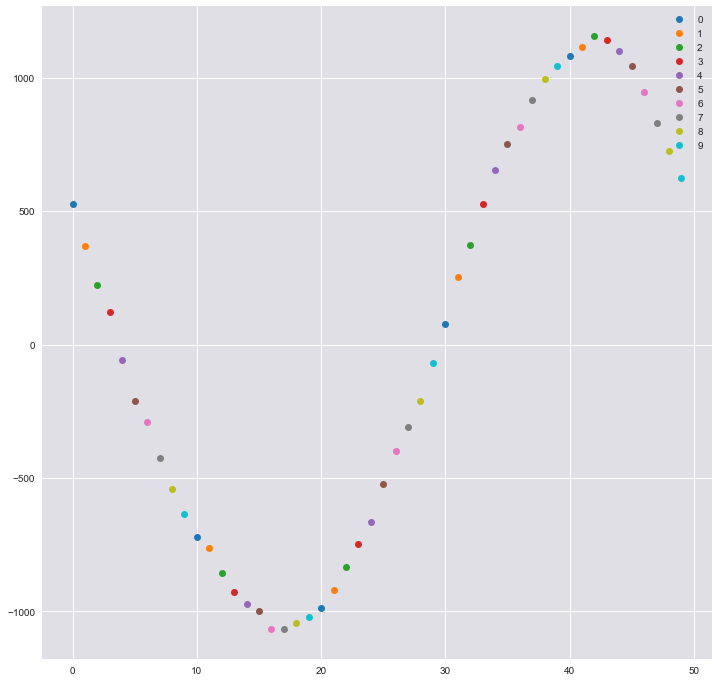

In [199]:
plt.figure(figsize=(12,12))
labels = np.arange(10)
for i in range(len(PC2)):
    if i in labels:
        mylabel = str(labels[i])
    else:
        mylabel = None
    plt.plot(np.arange(num_demes)[i],PC2[i],"o",label = mylabel)
# plt.xlabel('PC2')
# plt.xticks([])
# plt.ylabel(ylabel ="PC3")
# plt.yticks([])
plt.legend(loc = "upper right")
plt.savefig("WFsim_x_PC2.jpg")
plt.show()  

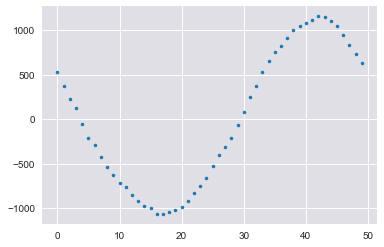

In [200]:
plt.plot(np.arange(num_demes),PC2,".")

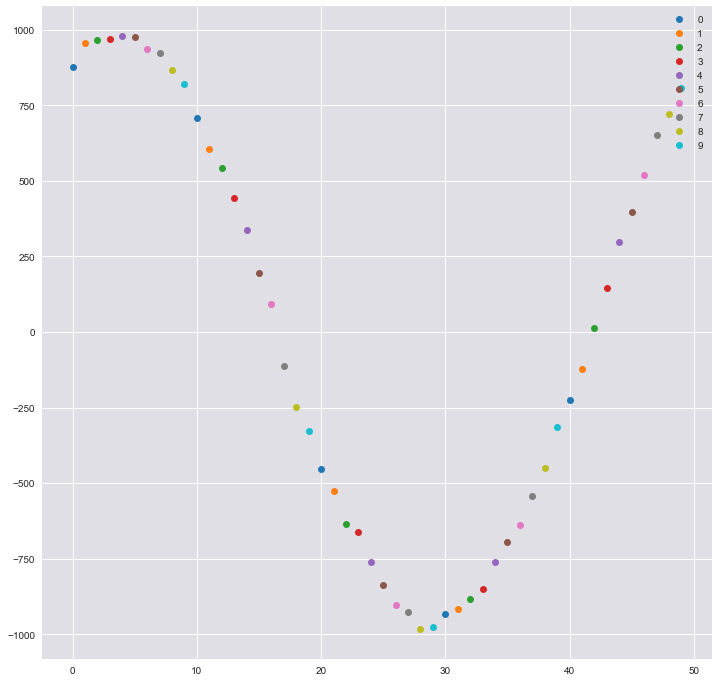

In [201]:
plt.figure(figsize=(12,12))
labels = np.arange(10)
for i in range(len(PC2)):
    if i in labels:
        mylabel = str(labels[i])
    else:
        mylabel = None
    plt.plot(np.arange(num_demes)[i],PC3[i],"o",label = mylabel)
# plt.xlabel('PC2')
# plt.xticks([])
# plt.ylabel(ylabel ="PC3")
# plt.yticks([])
plt.legend(loc = "upper right")
plt.savefig("WFsim_x_PC3.jpg")
plt.show()  

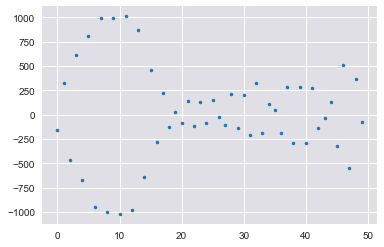

In [169]:
plt.plot(np.arange(num_demes),PC3,".")

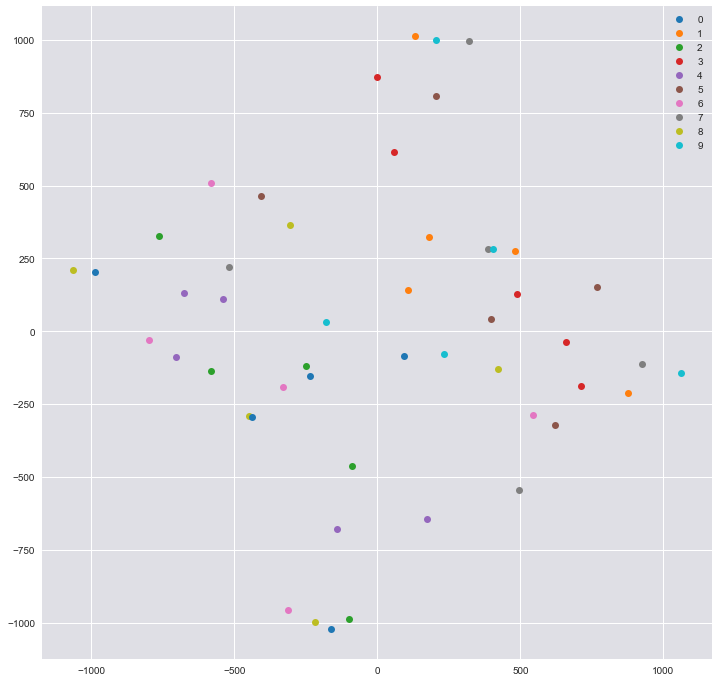

In [170]:
plt.figure(figsize=(12,12))
labels = np.arange(10)
for i in range(len(PC2)):
    if i in labels:
        mylabel = str(labels[i])
    else:
        mylabel = None
    plt.plot(PC2[i],PC3[i],"o",label = mylabel)
# plt.xlabel('PC2')
# plt.xticks([])
# plt.ylabel(ylabel ="PC3")
# plt.yticks([])
plt.legend(loc = "upper right")
plt.savefig("WFsim_PC2_PC3.jpg")

plt.show()    



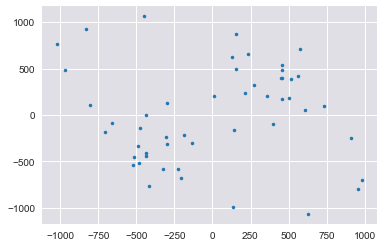

In [171]:
plt.plot(PC1,PC2,".")

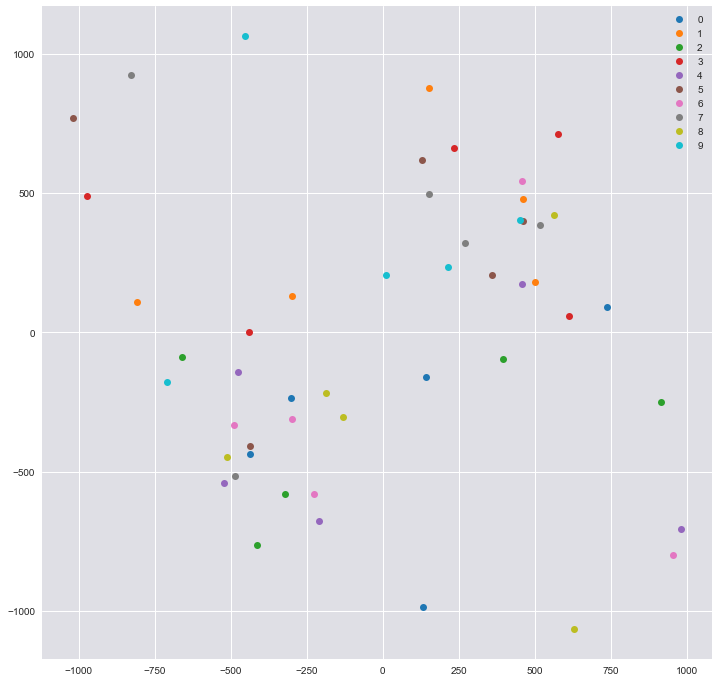

In [172]:
plt.figure(figsize=(12,12))
labels = np.arange(10)
for i in range(len(PC2)):
    if i in labels:
        mylabel = str(labels[i])
    else:
        mylabel = None
    plt.plot(PC1[i],PC2[i],"o",label = mylabel)
# plt.xlabel('PC2')
# plt.xticks([])
# plt.ylabel(ylabel ="PC3")
# plt.yticks([])
plt.legend(loc = "upper right")
plt.savefig("WFsim_PC1_PC2.jpg")

plt.show()    



In [ ]:
from sklearn.decomposition import PCA

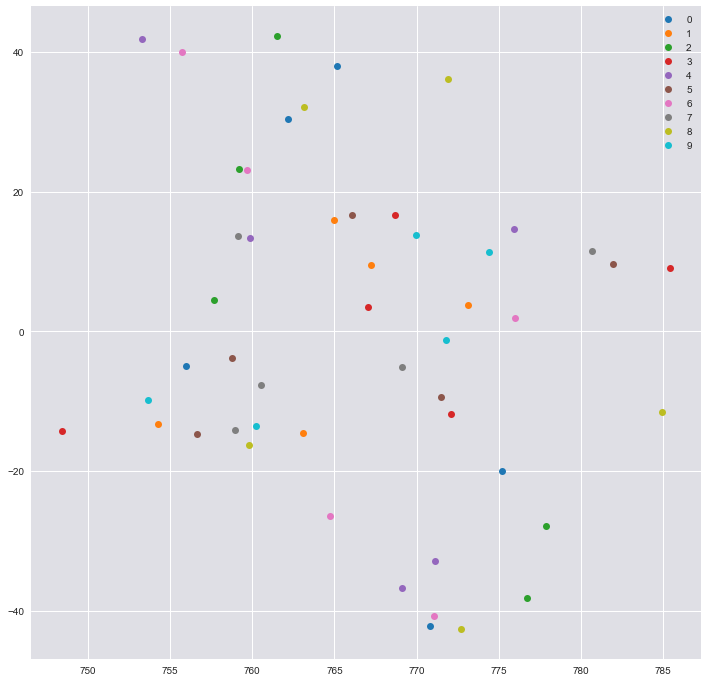

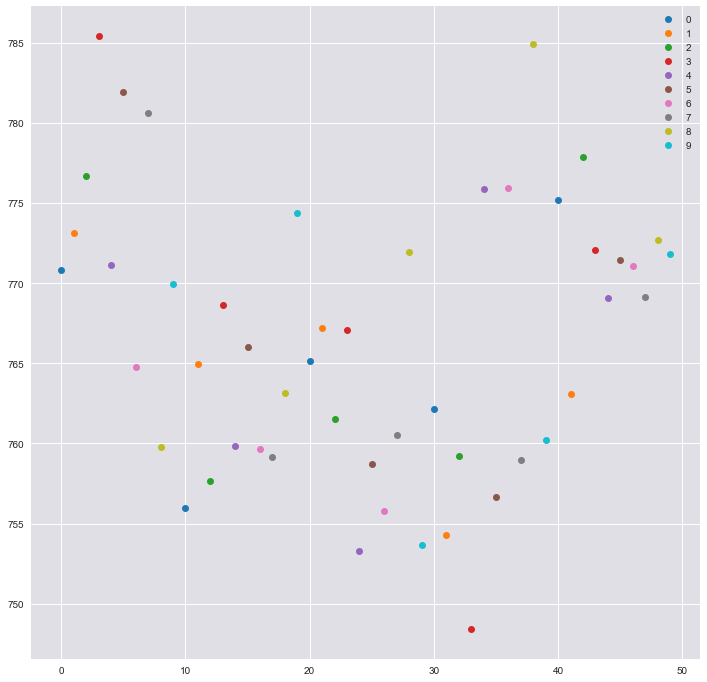

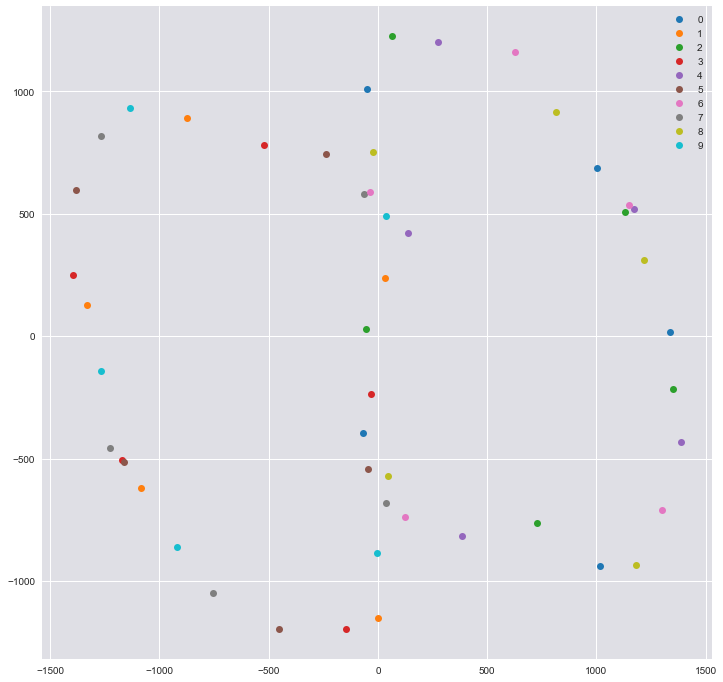

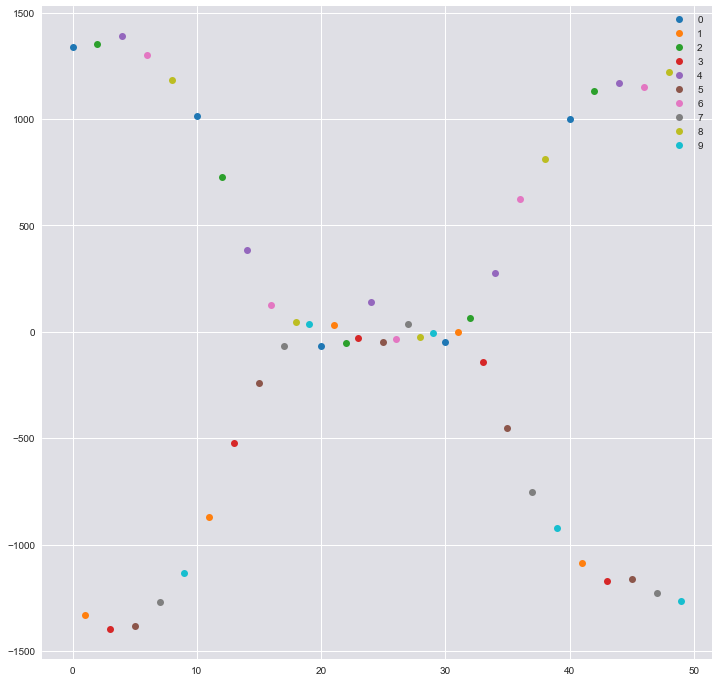

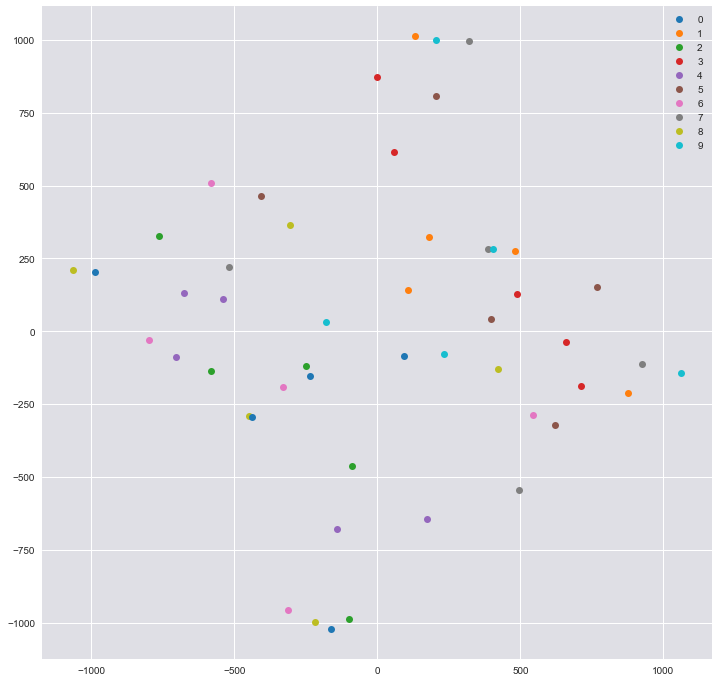

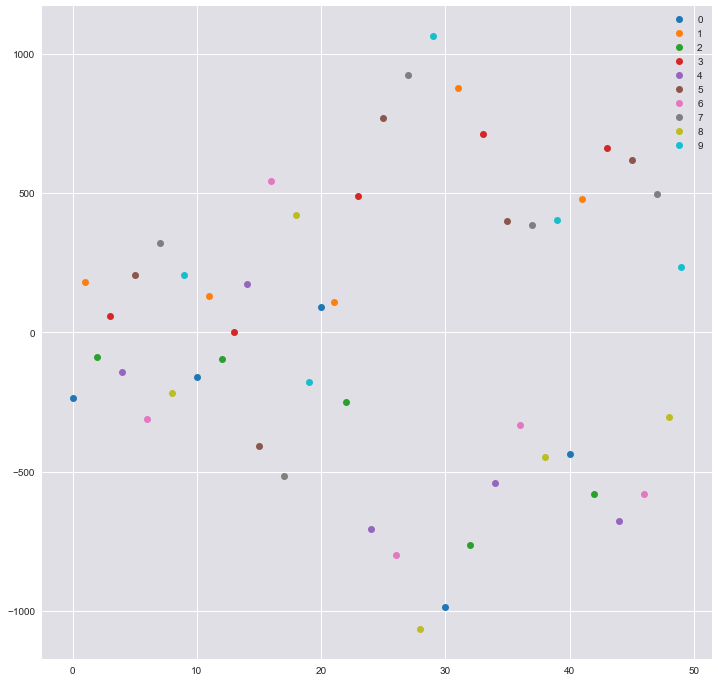

In [142]:
# Define parameters for 1D chain of demes
s = 0 # selection rate
N = 10**3 # population size
mu = 10**-4 # mutation rate
num_demes = 50 # number of demes simulated
num_reps = 1000 # number of independent sites simulated
num_gen = 5* 10**3 # number of simulation generations
p0 = 0.5 # initial allele frequency

m_arr = [.5,1,5]


for q in range(len(m_arr)):
    m = m_arr[q]

    f = SS_WF_sim(N,mu,s,m,num_reps,num_gen,num_demes,p0)

    prep_f = (f[-1] - np.mean(f[-1],axis=0))/np.std(f[-1],axis=0)

    pca = PCA(n_components=3)
    PCs = pca.fit_transform(prep_f)

    PC1 = prep_f.T@PCs[:, 0]
    PC2 = prep_f.T@PCs[:, 1]
    PC3 = prep_f.T@PCs[:, 2]
    
    plt.figure(figsize=(12,12))
    
    labels = np.arange(10)
    for i in range(len(PC2)):
        if i in labels:
            mylabel = str(labels[i])
        else:
            mylabel = None
        plt.plot(PC2[i],PC3[i],"o",label = mylabel)
        
    plt.legend(loc = "upper right")
    plt.savefig(f"WFsim_PC2_PC3_m_{m}.jpg")

    plt.show()  
    
    plt.figure(figsize=(12,12))
    
    labels = np.arange(10)
    for i in range(len(PC1)):
        if i in labels:
            mylabel = str(labels[i])
        else:
            mylabel = None
        plt.plot(np.arange(num_demes)[i],PC2[i],"o",label = mylabel)
        
    plt.legend(loc = "upper right")
    plt.savefig(f"WFsim_x_PC2_m_{m}.jpg")

    plt.show()    

In [143]:
print(pca.explained_variance_ratio_)

[0.07417755 0.07293539 0.06927129]


In [145]:
PCs.shape

(1000, 3)